In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan_application.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

We have 614 rows and 13 columns.

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Here, we have int data types in applicantincome column, float data types in coapplicantincome, loanamount, loan amount term and credit history columns where as object data types are present in the other columns.

# To check missing values

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Here, we can say that there are some missing values present in some of the columns.

<AxesSubplot:>

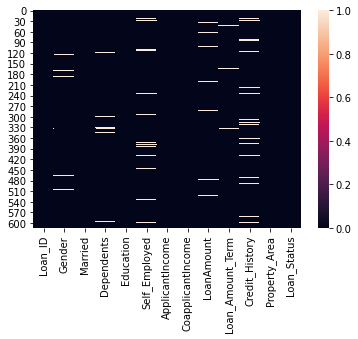

In [6]:
sns.heatmap(df.isnull())

In [7]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
df['Gender']=si.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married']=si.fit_transform(df['Married'].values.reshape(-1,1))
df['Self_Employed']=si.fit_transform(df['Self_Employed'].values.reshape(-1,1))

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

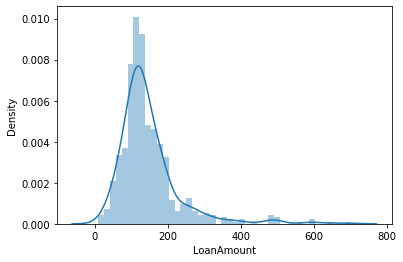

In [8]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

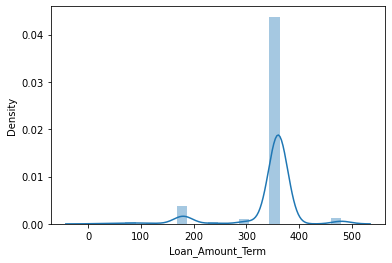

In [9]:
sns.distplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

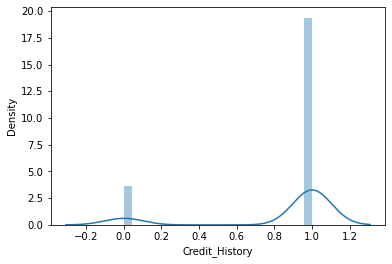

In [10]:
sns.distplot(df['Credit_History'])

Snce the datas are not distributed normally in any of the three columns, I am using median to replace the missing values in these three columns.

In [11]:
si=SimpleImputer(missing_values=np.NaN,strategy='median')
df['LoanAmount']=si.fit_transform(df['LoanAmount'].values.reshape(-1,1))
df['Loan_Amount_Term']=si.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))
df['Credit_History']=si.fit_transform(df['Credit_History'].values.reshape(-1,1))

In [12]:
si=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
df['Dependents']=si.fit_transform(df['Dependents'].values.reshape(-1,1))

In [13]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Here, there are no missing values after replacing them with median and mode.

# EDA

<AxesSubplot:xlabel='Gender', ylabel='count'>

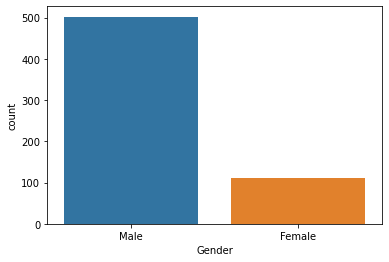

In [15]:
sns.countplot(df['Gender'])

From the above observations, 502 applicants are male and 112 applicants are female.

<AxesSubplot:xlabel='Married', ylabel='count'>

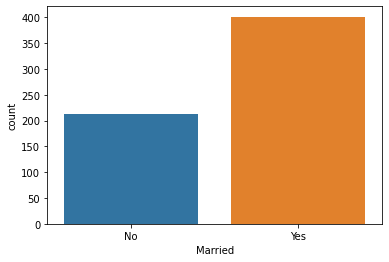

In [16]:
sns.countplot(df['Married'])

From the above observations, 401 applicants are married and 213 are unmarried.

<AxesSubplot:xlabel='Education', ylabel='count'>

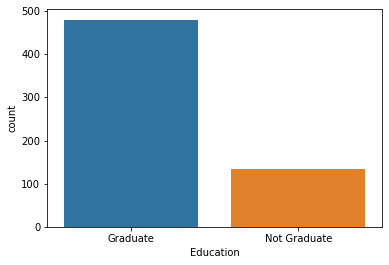

In [17]:
sns.countplot(df['Education'])

From the above observations, 480 applicants are graduate and 134 applicants are not graduate.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

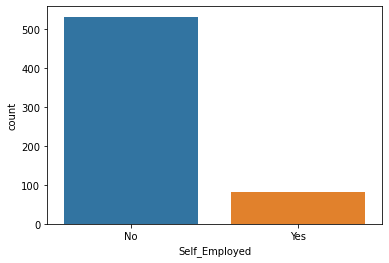

In [18]:
sns.countplot(df['Self_Employed'])

From the above observations, 82 applicants are self employed and 532 are not employed.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

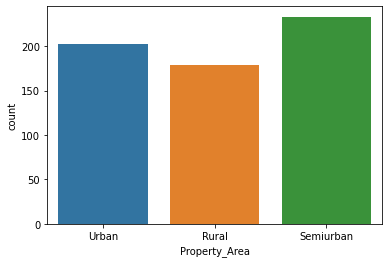

In [19]:
sns.countplot(df['Property_Area'])

From the above observations, 233 applicants are from semi-urban, 202 applicants are from urban and 179 applicants are from rural.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

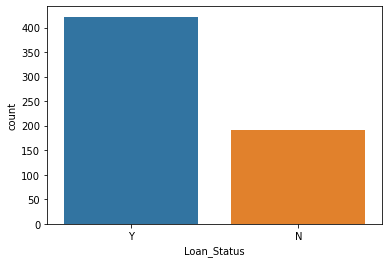

In [20]:
sns.countplot(df['Loan_Status'])

In [21]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Here, we can say that class is imbalanced.

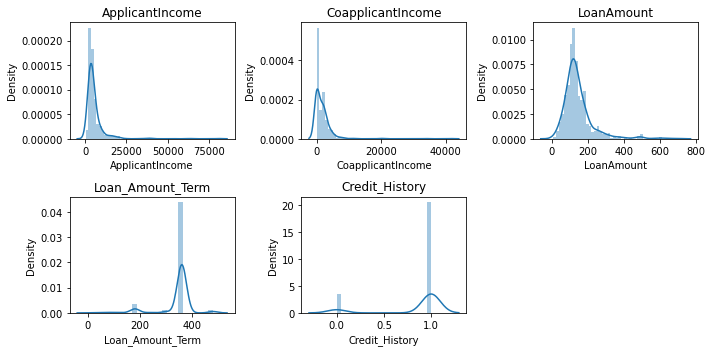

In [22]:
k=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
j=1
plt.figure(figsize=(10,5))
for i in k:
    plt.subplot(2,3,j)
    sns.distplot(df[i])
    plt.title(i)
    j=j+1
plt.tight_layout()  

The datas are not distributed normally in all the columns.

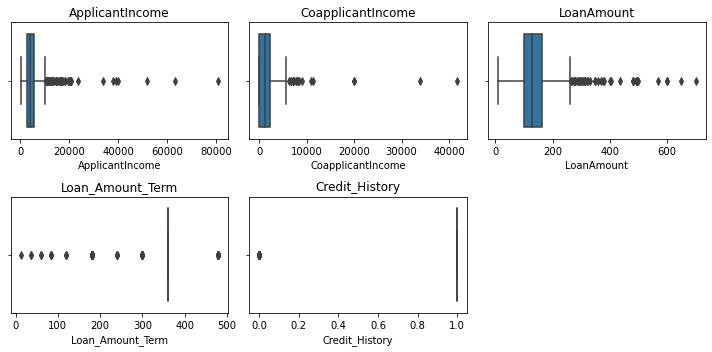

In [23]:
k=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
j=1
plt.figure(figsize=(10,5))
for i in k:
    plt.subplot(2,3,j)
    sns.boxplot(df[i])
    plt.title(i)
    j=j+1
plt.tight_layout()  

There are outliers present in all the columns.

In [24]:
y=df[['Loan_Status']]

In [25]:
df.drop('Loan_Status',axis=1,inplace=True)

In [26]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

Here, we can say that there is some skewness present in some of the columns.  Lets remove it by applying some transforms.

In [27]:
df_new=df.copy(deep=True)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

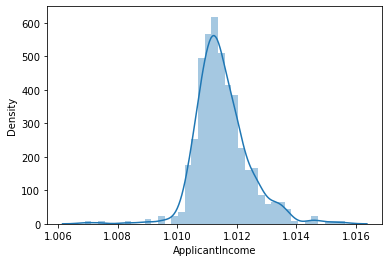

In [39]:
df_new['ApplicantIncome']=np.cbrt(df_new['ApplicantIncome'])
sns.distplot(df_new['ApplicantIncome'])

I have removed the skewness by applying cbrt transform.

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

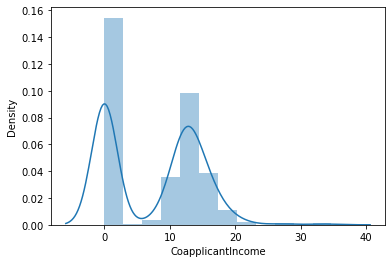

In [29]:
df_new['CoapplicantIncome']=np.cbrt(df_new['CoapplicantIncome'])
sns.distplot(df_new['CoapplicantIncome'])

I have removed the skewness by applying cbrt transform.

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

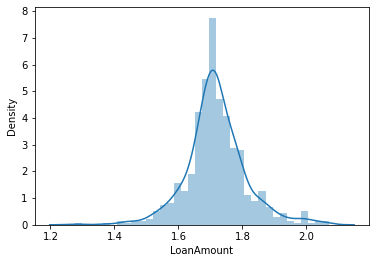

In [34]:
df_new['LoanAmount']=np.cbrt(df_new['LoanAmount'])
sns.distplot(df_new['LoanAmount'])

I have removed the skewness by applying cbrt transform.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

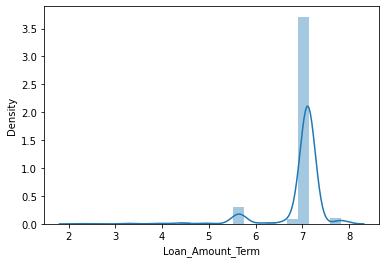

In [31]:
df_new['Loan_Amount_Term']=np.cbrt(df_new['Loan_Amount_Term'])
sns.distplot(df_new['Loan_Amount_Term'])

The skewness has not been removed in this column after applying cbrt transform.

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

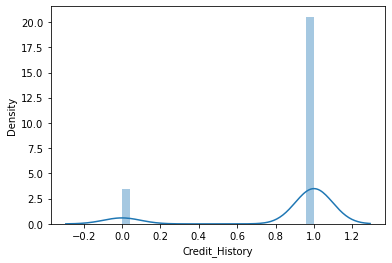

In [32]:
df_new['Credit_History']=np.sqrt(df_new['Credit_History'])
sns.distplot(df_new['Credit_History'])

In [40]:
df_new.skew()

ApplicantIncome      0.486779
CoapplicantIncome    0.196726
LoanAmount           0.180761
Loan_Amount_Term    -3.578100
Credit_History      -2.021971
dtype: float64

Here, we can say that our skewness has been removed except in loan amount term column.

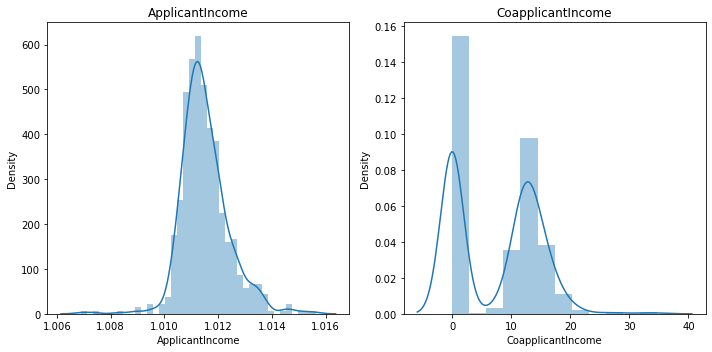

In [41]:
k=['ApplicantIncome','CoapplicantIncome']
j=1
plt.figure(figsize=(10,5))
for i in k:
    plt.subplot(1,2,j)
    sns.distplot(df_new[i])
    plt.title(i)
    j=j+1
plt.tight_layout()  

Datas are distributed normally in all the columns.

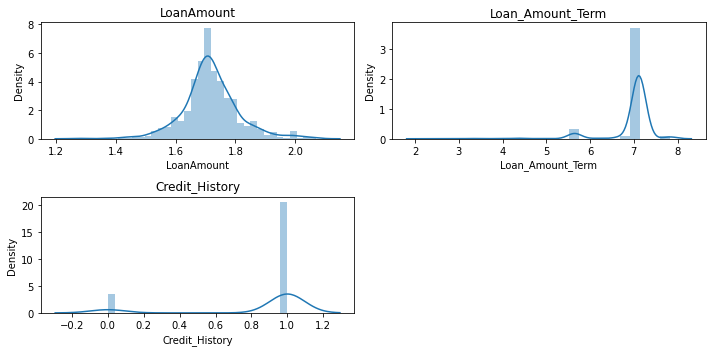

In [42]:
k=['LoanAmount','Loan_Amount_Term','Credit_History']
j=1
plt.figure(figsize=(10,5))
for i in k:
    plt.subplot(2,2,j)
    sns.distplot(df_new[i])
    plt.title(i)
    j=j+1
plt.tight_layout() 

The data is only distributed normally in loan amount column where as in the the rest of the two columns, data is not normally distributed.

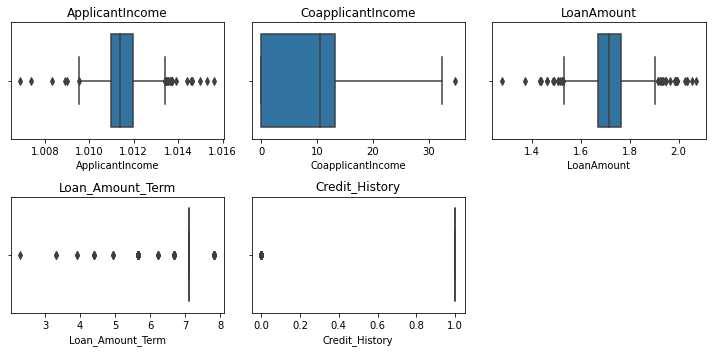

In [43]:
k=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
j=1
plt.figure(figsize=(10,5))
for i in k:
    plt.subplot(2,3,j)
    sns.boxplot(df_new[i])
    plt.title(i)
    j=j+1
plt.tight_layout()  

There are outliers present in all the columns.

In [44]:
df_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,1.011970,0.000000,1.714488,7.113787,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,1.011631,11.467457,1.714488,7.113787,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,1.011043,0.000000,1.592838,7.113787,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,1.010836,13.310098,1.702237,7.113787,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,1.012005,0.000000,1.733014,7.113787,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,1.010996,0.000000,1.605814,7.113787,1.0,Rural
610,LP002979,Male,Yes,3+,Graduate,No,1.011479,0.000000,1.506630,5.646216,1.0,Rural
611,LP002983,Male,Yes,1,Graduate,No,1.012417,6.214465,1.849326,7.113787,1.0,Urban
612,LP002984,Male,Yes,2,Graduate,No,1.012330,0.000000,1.788244,7.113787,1.0,Urban


In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new['Gender']=le.fit_transform(df_new['Gender'])
df_new['Married']=le.fit_transform(df_new['Married'])
df_new['Education']=le.fit_transform(df_new['Education'])
df_new['Self_Employed']=le.fit_transform(df_new['Self_Employed'])
df_new['Property_Area']=le.fit_transform(df_new['Property_Area'])

In [46]:
df_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1,0,0,0,0,1.011970,0.000000,1.714488,7.113787,1.0,2
1,LP001003,1,1,1,0,0,1.011631,11.467457,1.714488,7.113787,1.0,0
2,LP001005,1,1,0,0,1,1.011043,0.000000,1.592838,7.113787,1.0,2
3,LP001006,1,1,0,1,0,1.010836,13.310098,1.702237,7.113787,1.0,2
4,LP001008,1,0,0,0,0,1.012005,0.000000,1.733014,7.113787,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,1.010996,0.000000,1.605814,7.113787,1.0,0
610,LP002979,1,1,3+,0,0,1.011479,0.000000,1.506630,5.646216,1.0,0
611,LP002983,1,1,1,0,0,1.012417,6.214465,1.849326,7.113787,1.0,2
612,LP002984,1,1,2,0,0,1.012330,0.000000,1.788244,7.113787,1.0,2


In [47]:
df_new.drop('Loan_ID',axis=1,inplace=True)

In [48]:
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,1.011970,0.000000,1.714488,7.113787,1.0,2
1,1,1,1,0,0,1.011631,11.467457,1.714488,7.113787,1.0,0
2,1,1,0,0,1,1.011043,0.000000,1.592838,7.113787,1.0,2
3,1,1,0,1,0,1.010836,13.310098,1.702237,7.113787,1.0,2
4,1,0,0,0,0,1.012005,0.000000,1.733014,7.113787,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.010996,0.000000,1.605814,7.113787,1.0,0
610,1,1,3+,0,0,1.011479,0.000000,1.506630,5.646216,1.0,0
611,1,1,1,0,0,1.012417,6.214465,1.849326,7.113787,1.0,2
612,1,1,2,0,0,1.012330,0.000000,1.788244,7.113787,1.0,2


I have dropped the Loan_ID column since it is not having any effect on the loan status column which is our target variable.

In [49]:
df_new['Dependents'].replace('3+',3,inplace=True)

In [50]:
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,1.011970,0.000000,1.714488,7.113787,1.0,2
1,1,1,1,0,0,1.011631,11.467457,1.714488,7.113787,1.0,0
2,1,1,0,0,1,1.011043,0.000000,1.592838,7.113787,1.0,2
3,1,1,0,1,0,1.010836,13.310098,1.702237,7.113787,1.0,2
4,1,0,0,0,0,1.012005,0.000000,1.733014,7.113787,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.010996,0.000000,1.605814,7.113787,1.0,0
610,1,1,3,0,0,1.011479,0.000000,1.506630,5.646216,1.0,0
611,1,1,1,0,0,1.012417,6.214465,1.849326,7.113787,1.0,2
612,1,1,2,0,0,1.012330,0.000000,1.788244,7.113787,1.0,2


In [51]:
df_new['Loan_Status']=y['Loan_Status']
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1.011970,0.000000,1.714488,7.113787,1.0,2,Y
1,1,1,1,0,0,1.011631,11.467457,1.714488,7.113787,1.0,0,N
2,1,1,0,0,1,1.011043,0.000000,1.592838,7.113787,1.0,2,Y
3,1,1,0,1,0,1.010836,13.310098,1.702237,7.113787,1.0,2,Y
4,1,0,0,0,0,1.012005,0.000000,1.733014,7.113787,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.010996,0.000000,1.605814,7.113787,1.0,0,Y
610,1,1,3,0,0,1.011479,0.000000,1.506630,5.646216,1.0,0,Y
611,1,1,1,0,0,1.012417,6.214465,1.849326,7.113787,1.0,2,Y
612,1,1,2,0,0,1.012330,0.000000,1.788244,7.113787,1.0,2,Y


In [52]:
df_new['Loan_Status']=le.fit_transform(df_new['Loan_Status'])

In [53]:
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1.011970,0.000000,1.714488,7.113787,1.0,2,1
1,1,1,1,0,0,1.011631,11.467457,1.714488,7.113787,1.0,0,0
2,1,1,0,0,1,1.011043,0.000000,1.592838,7.113787,1.0,2,1
3,1,1,0,1,0,1.010836,13.310098,1.702237,7.113787,1.0,2,1
4,1,0,0,0,0,1.012005,0.000000,1.733014,7.113787,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.010996,0.000000,1.605814,7.113787,1.0,0,1
610,1,1,3,0,0,1.011479,0.000000,1.506630,5.646216,1.0,0,1
611,1,1,1,0,0,1.012417,6.214465,1.849326,7.113787,1.0,2,1
612,1,1,2,0,0,1.012330,0.000000,1.788244,7.113787,1.0,2,1


In [54]:
from sklearn.utils import resample

In [55]:
train_positive=df_new[df_new['Loan_Status']==1]
train_negative=df_new[df_new['Loan_Status']==0]

# Upsample minority class
train_positive_upsample=resample(train_negative,replace=True,n_samples=422,random_state=18)

# Combine majority class with upsampled minority class
df1=pd.concat([train_positive,train_positive_upsample])

# Display new class counts
df1['Loan_Status'].value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

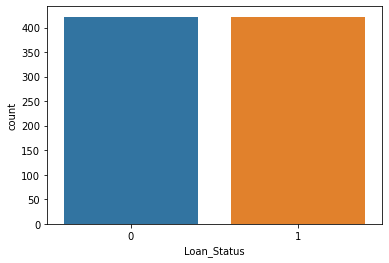

In [56]:
sns.countplot(df1['Loan_Status'])

Here, the class is balanced after adding copies to the minority class.

In [57]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1.011970,0.000000,1.714488,7.113787,1.0,2,1
2,1,1,0,0,1,1.011043,0.000000,1.592838,7.113787,1.0,2,1
3,1,1,0,1,0,1.010836,13.310098,1.702237,7.113787,1.0,2,1
4,1,0,0,0,0,1.012005,0.000000,1.733014,7.113787,1.0,2,1
5,1,1,2,0,1,1.011863,16.129163,1.860426,7.113787,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
179,1,0,0,1,0,1.010695,11.321113,1.671775,7.829735,0.0,2,0
328,0,1,0,0,0,1.011553,13.482831,1.685860,7.113787,1.0,2,0
357,1,1,1,0,0,1.011398,0.000000,1.595501,7.113787,1.0,2,0
410,0,0,1,1,1,1.011395,0.000000,1.581811,7.113787,1.0,1,0


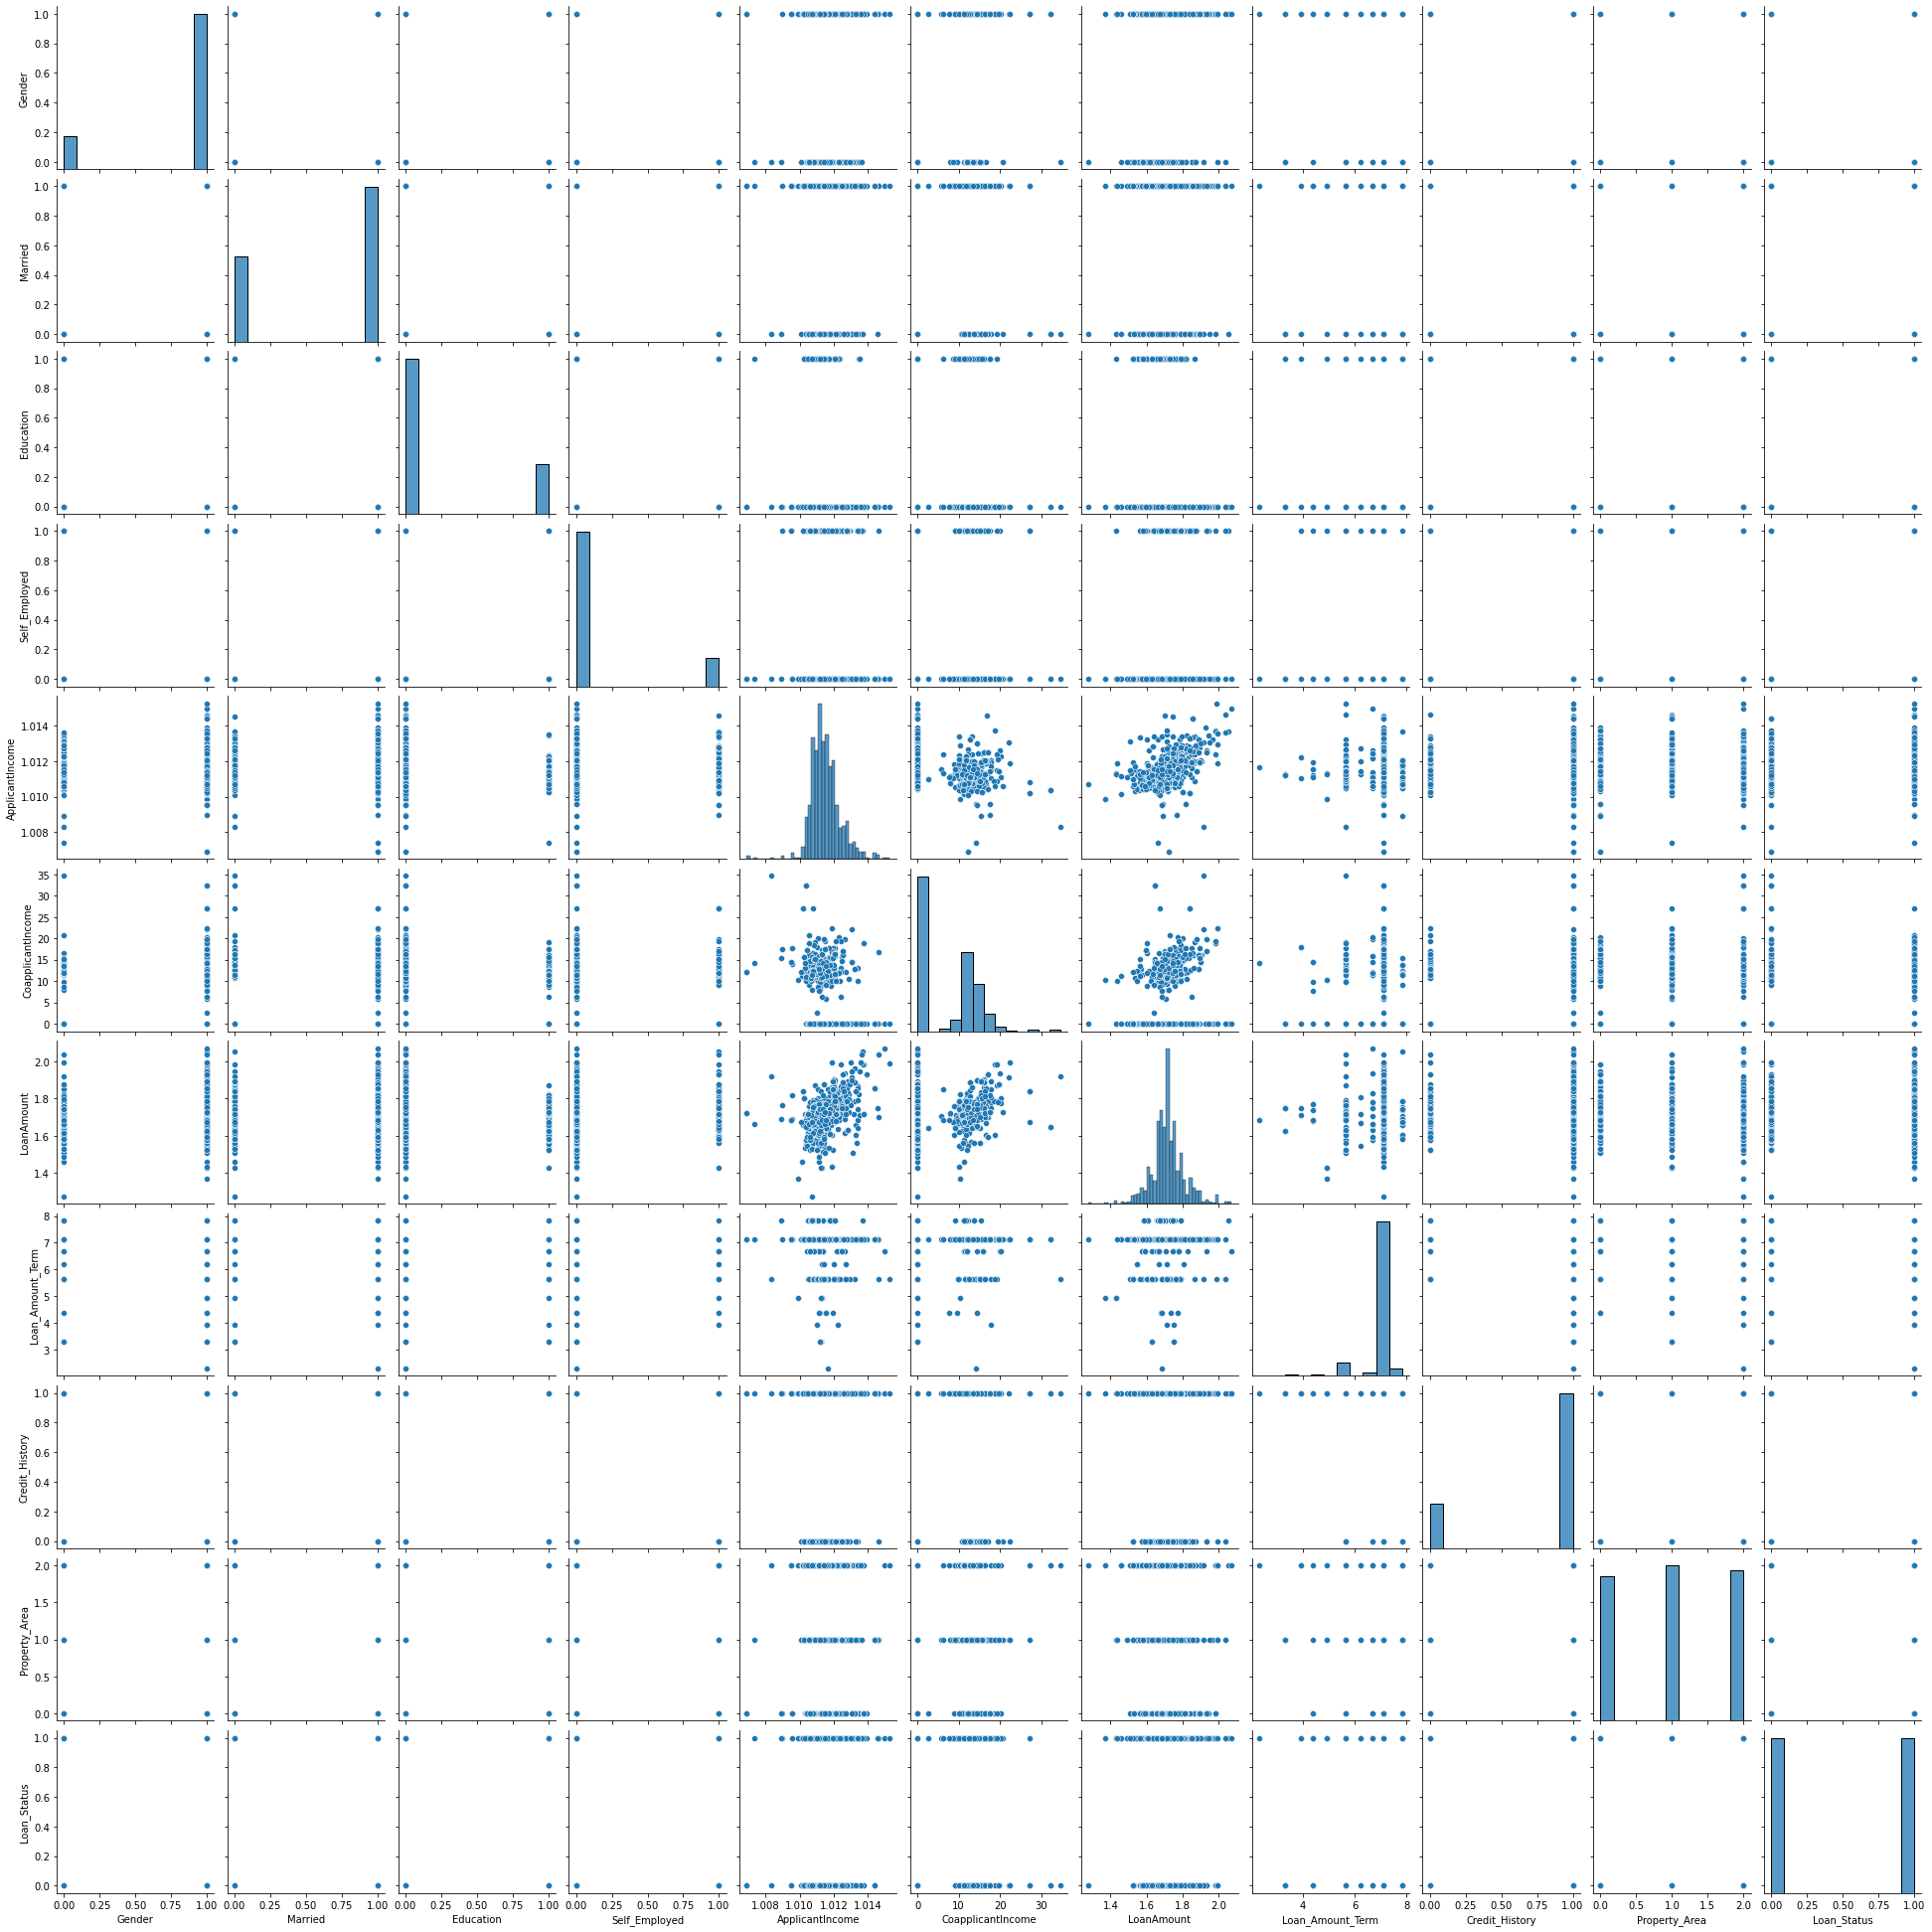

In [58]:
sns.pairplot(df1)

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

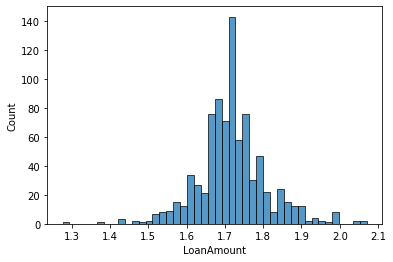

In [60]:
sns.histplot(df1['LoanAmount'])

There is some skewness present in this column.

<AxesSubplot:xlabel='Property_Area', ylabel='Count'>

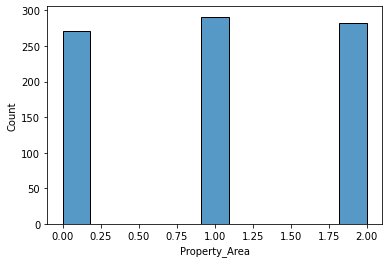

In [61]:
sns.histplot(df1['Property_Area'])

The plot is normally distributed in this column without any skewness.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

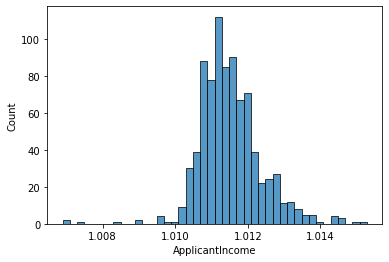

In [62]:
sns.histplot(df1['ApplicantIncome'])

There is some skewness present in this column.

In [63]:
df1['Dependents']=df1['Dependents'].astype('int')

In [64]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[0.46113304, 1.3500898 , 0.74279963, ..., 0.53716815, 1.21945988,
        1.        ],
       [0.46113304, 0.74069147, 0.74279963, ..., 0.53716815, 1.21945988,
        1.        ],
       [0.46113304, 0.74069147, 0.74279963, ..., 0.53716815, 1.21945988,
        1.        ],
       ...,
       [0.46113304, 0.74069147, 0.23068312, ..., 0.53716815, 1.21945988,
        1.        ],
       [2.16857158, 1.3500898 , 0.23068312, ..., 0.53716815, 0.01610331,
        1.        ],
       [0.46113304, 1.3500898 , 0.74279963, ..., 0.53716815, 0.01610331,
        1.        ]])

In [65]:
print(np.where(z>3))

(array([ 10,  10,  41,  59,  59,  88,  91,  91, 104, 104, 116, 116, 123,
       164, 214, 230, 230, 306, 322, 341, 343, 345, 382, 388, 395, 414,
       506, 508, 532, 552, 565, 573, 607, 622, 642, 709, 732, 762, 763,
       768, 784, 787, 787, 788, 802, 815, 818, 843], dtype=int64), array([7, 8, 8, 7, 8, 7, 7, 8, 5, 7, 5, 7, 5, 8, 8, 5, 7, 5, 5, 8, 8, 5,
       7, 7, 8, 7, 6, 7, 8, 6, 7, 5, 5, 5, 8, 8, 8, 7, 8, 5, 6, 5, 6, 5,
       7, 5, 8, 8], dtype=int64))


In [66]:
df2=df1[(z<3).all(axis=1)]
df2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1.011970,0.000000,1.714488,7.113787,1.0,2,1
2,1,1,0,0,1,1.011043,0.000000,1.592838,7.113787,1.0,2,1
3,1,1,0,1,0,1.010836,13.310098,1.702237,7.113787,1.0,2,1
4,1,0,0,0,0,1.012005,0.000000,1.733014,7.113787,1.0,2,1
5,1,1,2,0,1,1.011863,16.129163,1.860426,7.113787,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
503,1,1,1,1,0,1.011460,17.437327,1.728878,7.113787,1.0,0,0
179,1,0,0,1,0,1.010695,11.321113,1.671775,7.829735,0.0,2,0
328,0,1,0,0,0,1.011553,13.482831,1.685860,7.113787,1.0,2,0
357,1,1,1,0,0,1.011398,0.000000,1.595501,7.113787,1.0,2,0


In [67]:
df1.shape

(844, 12)

In [68]:
df2.shape

(803, 12)

In [99]:
((844-803)/844)*100

4.857819905213271

Here, 41 rows have been removed since there are outliers present in it.

In [70]:
x=df2.iloc[:,0:-1]
y=df2.iloc[:,-1]

In [71]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,1.011970,0.000000,1.714488,7.113787,1.0,2
2,1,1,0,0,1,1.011043,0.000000,1.592838,7.113787,1.0,2
3,1,1,0,1,0,1.010836,13.310098,1.702237,7.113787,1.0,2
4,1,0,0,0,0,1.012005,0.000000,1.733014,7.113787,1.0,2
5,1,1,2,0,1,1.011863,16.129163,1.860426,7.113787,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
503,1,1,1,1,0,1.011460,17.437327,1.728878,7.113787,1.0,0
179,1,0,0,1,0,1.010695,11.321113,1.671775,7.829735,0.0,2
328,0,1,0,0,0,1.011553,13.482831,1.685860,7.113787,1.0,2
357,1,1,1,0,0,1.011398,0.000000,1.595501,7.113787,1.0,2


In [72]:
y

0      1
2      1
3      1
4      1
5      1
      ..
503    0
179    0
328    0
357    0
410    0
Name: Loan_Status, Length: 803, dtype: int32

In [73]:
x.shape

(803, 11)

In [74]:
y.shape

(803,)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [76]:
maxAcc=0
MaxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc,
        maxRS=i
print('Best accuracy is',maxAcc,'on random state',maxRS)  

Best accuracy is (0.9087136929460581,) on random state 17


In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=17)

In [78]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(562, 11)
(241, 11)
(562,)
(241,)


In [79]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [80]:
pred=lg.predict(x_test)
pred


array([0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [81]:
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.6970954356846473
[[69 66]
 [ 7 99]]
              precision    recall  f1-score   support

           0       0.91      0.51      0.65       135
           1       0.60      0.93      0.73       106

    accuracy                           0.70       241
   macro avg       0.75      0.72      0.69       241
weighted avg       0.77      0.70      0.69       241



In [82]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.6804979253112033
[[ 62  73]
 [  4 102]]
              precision    recall  f1-score   support

           0       0.94      0.46      0.62       135
           1       0.58      0.96      0.73       106

    accuracy                           0.68       241
   macro avg       0.76      0.71      0.67       241
weighted avg       0.78      0.68      0.66       241



In [83]:
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.6846473029045643
[[ 61  74]
 [  2 104]]
              precision    recall  f1-score   support

           0       0.97      0.45      0.62       135
           1       0.58      0.98      0.73       106

    accuracy                           0.68       241
   macro avg       0.78      0.72      0.67       241
weighted avg       0.80      0.68      0.67       241



In [84]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9128630705394191
[[132   3]
 [ 18  88]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       135
           1       0.97      0.83      0.89       106

    accuracy                           0.91       241
   macro avg       0.92      0.90      0.91       241
weighted avg       0.92      0.91      0.91       241



In [85]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.6970954356846473
[[85 50]
 [23 83]]
              precision    recall  f1-score   support

           0       0.79      0.63      0.70       135
           1       0.62      0.78      0.69       106

    accuracy                           0.70       241
   macro avg       0.71      0.71      0.70       241
weighted avg       0.72      0.70      0.70       241



In [86]:
rf=RandomForestClassifier(n_estimators=150)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9377593360995851
[[132   3]
 [ 12  94]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       135
           1       0.97      0.89      0.93       106

    accuracy                           0.94       241
   macro avg       0.94      0.93      0.94       241
weighted avg       0.94      0.94      0.94       241



These accuracy scores can be because of overfitting. Lets check with cross validation.

# Cross Validation

In [87]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())

[0.71428571 0.72049689 0.75776398 0.68125    0.73125   ]
0.7210093167701863


In [88]:
score=cross_val_score(gnb,x,y,cv=5)
print(score)
print(score.mean())

[0.70186335 0.70807453 0.7515528  0.70625    0.725     ]
0.7185481366459627


In [89]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())

[0.81987578 0.9068323  0.88198758 0.85       0.875     ]
0.8667391304347827


In [90]:
score=cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())

[0.69565217 0.70807453 0.74534161 0.7125     0.68125   ]
0.7085636645962732


In [91]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())

[0.73291925 0.8136646  0.80124224 0.75       0.7125    ]
0.7620652173913044


In [92]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())

[0.88819876 0.95031056 0.91304348 0.93125    0.90625   ]
0.9178105590062111


The least difference between the highest accuracy score and cv score says that random forest model is working better.

# Hyper Parameter Tuning

We use this technique to improve the accuracy of the best model that we have choosen.

In [93]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[90,100,110],
            'criterion':['gini','entropy'],
            'max_depth':range(2,20,2),
            'min_samples_split':range(2,10,1),
            'max_features':['auto','sqrt','log2']}
gs=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20, 2),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': range(2, 10),
                         'n_estimators': [90, 100, 110]})

In [94]:
print(gs.best_params_)

{'criterion': 'entropy', 'max_depth': 16, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}


In [96]:
gs.best_score_

0.8790297092288244

In [97]:
RFmodel=RandomForestClassifier(criterion='entropy',n_estimators=100,max_depth=16,max_features='log2',min_samples_split=2)
RFmodel.fit(x_train,y_train)
pred=RFmodel.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

92.5311203319502


# Saving the model

In [98]:
import joblib
joblib.dump(RFmodel,'rfmodel.obj')

['rfmodel.obj']